# Homework 10 

In [19]:
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Q1
data = sns.load_dataset('diamonds')

In [3]:
#Q2 
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

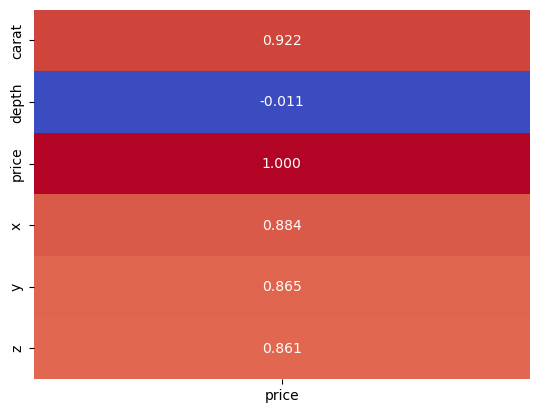

In [18]:
#Q3
data_corr = data[['carat','depth','price','x','y','z']].corr()
price_corr = data_corr[['price']]
sns.heatmap(data=price_corr ,annot=True, fmt='.3f', cmap='coolwarm', cbar=False)

In [22]:
#Q4
#Use the column with the strongest correlation to split the data into test and training datasets, 
#where the test dataset consists of 30% of the total dataset. Be sure to specify a value for the random_state parameter.
x_train, x_test, y_train, y_test = train_test_split(data[['price']], data[['carat']] , test_size=0.3 , random_state=45)

In [23]:
#Q5
#Create a Linear Regression object, and then fit the training dataset to the model.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
#Q6
#Score the model using the test dataset.
model.score(x_test, y_test)

0.8514928648824682

In [29]:
#Q7
#Predict the y values based on the x values in the test dataset, and store the results in a variable.
y_pre = model.predict(x_test)

In [37]:
#Q8
#Put the predicted values in a DataFrame.
pre = pd.DataFrame(y_pre, columns = ['pridcted_carat'])

,pridcted_carat
0,0.474724
1,0.463969
2,0.501063
3,0.896147
4,0.414144
...,...
16177,0.565264
16178,0.499526
16179,0.434447
16180,1.161622


In [43]:
#Q9
#Join the y_test and predicted data with the x_test data, save the joined data in a new DataFrame, 
#and then display the first five rows of data.
y_test_1d = y_test.squeeze()
y_pre_1d = y_pre.squeeze()
x_test_1d = x_test.squeeze()
pre_data = pd.DataFrame({'actual_carat': y_test_1d, 'predicted_carat': y_pre_1d, 'price': x_test_1d})
pre_data.head()

,actual_carat,predicted_carat,price
37484,0.35,0.474724,984
35113,0.30,0.463969,886
41404,0.56,0.501063,1224
10595,1.07,0.896147,4824
28621,0.24,0.414144,432


In [47]:
#Q10
melted_data = pd.melt(pre_data, value_vars=['actual_carat', 'predicted_carat'], var_name='Variable', value_name='Carat')
melted_data

,Variable,Carat
0,actual_carat,0.350000
1,actual_carat,0.300000
2,actual_carat,0.560000
3,actual_carat,1.070000
4,actual_carat,0.240000
...,...,...
32359,predicted_carat,0.565264
32360,predicted_carat,0.499526
32361,predicted_carat,0.434447
32362,predicted_carat,1.161622


<Axes: xlabel='actual_carat', ylabel='predicted_carat'>

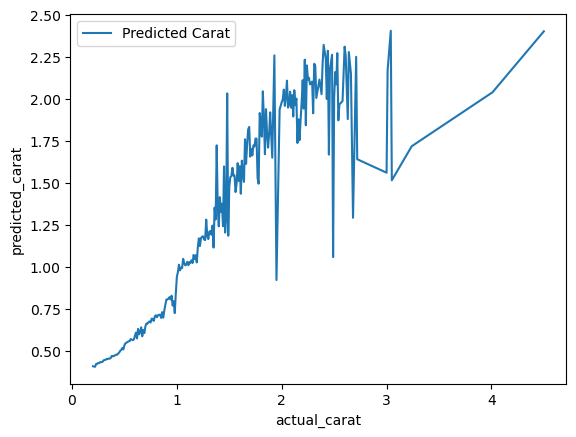

In [56]:
#Q11
sns.lineplot(data=pre_data, x='actual_carat', y='predicted_carat', label='Predicted Carat', errorbar=None)